# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# **First Peek Into the Data**

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Pre-Process**

In [5]:
#drop col with too many missing values
missing_threshold = 0.4
train_df = train_df.loc[:, train_df.isnull().mean() < missing_threshold]
test_df = test_df.loc[:, test_df.isnull().mean() < missing_threshold]

#fill numerical NaNs with median
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
num_cols_test = [col for col in num_cols if col in test_df.columns]
test_df[num_cols_test] = test_df[num_cols_test].fillna(test_df[num_cols_test].median())

#fill categorical NaNs with mode
cat_cols = train_df.select_dtypes(include=['object']).columns
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])

#encode categorical columns
full_df = pd.concat([train_df.drop('SalePrice', axis=1), test_df], axis=0)
full_df = pd.get_dummies(full_df)

#re-split
X_train = full_df.iloc[:train_df.shape[0], :]
X_test = full_df.iloc[train_df.shape[0]:, :]
y_train = train_df['SalePrice']

# **Visualize Sales price as target**

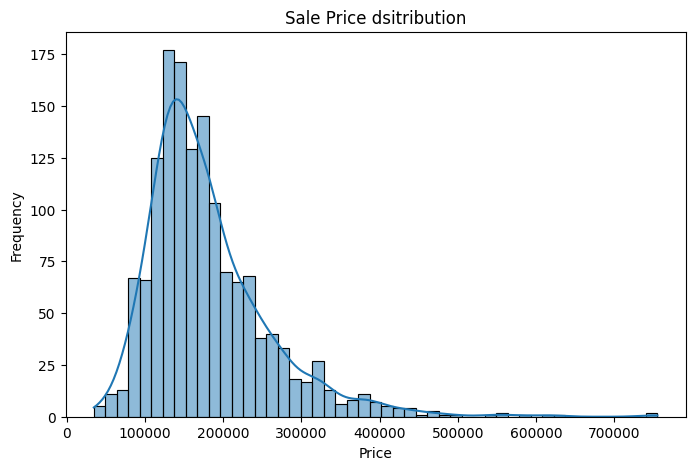

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(y_train, kde=True)
plt.title("Sale Price dsitribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# **Training and Evaluating Regression Models**

**Function for evaluating the model together**

In [8]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(f"\n{name}")
    print("Train R²:", r2_score(y_train, y_pred_train))
    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

**1. Simple Linear Rgression**

In [9]:
simple_model = LinearRegression()
evaluate_model(simple_model, "Simple Linear Regression")


Simple Linear Regression
Train R²: 0.9301258799135025
Train RMSE: 20992.41060414094


**2. Multiple Linear Regression**

In [10]:
multi_model = LinearRegression()
evaluate_model(multi_model, "Multiple Linear Regression")


Multiple Linear Regression
Train R²: 0.9301258799135025
Train RMSE: 20992.41060414094


**3. Polynomial Regression (d=2)**

In [11]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
evaluate_model(poly_model, "Polynomial Regression (degree 2)")


Polynomial Regression (degree 2)
Train R²: 1.0
Train RMSE: 1.5305952645254843e-05


**4. Ridge Regression**

In [12]:
ridge_model = Ridge(alpha=1.0)
evaluate_model(ridge_model, "Ridge Regression")


Ridge Regression
Train R²: 0.917997227881677
Train RMSE: 22741.4631711075


**5. Lasso Regression**

In [13]:
lasso_model = Lasso(alpha=0.01)
evaluate_model(lasso_model, "Lasso Regression")


Lasso Regression
Train R²: 0.9301258778064068
Train RMSE: 20992.410920660248


**6. ElasticNet Regression**

In [14]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
evaluate_model(elastic_model, "ElasticNet Regression")


ElasticNet Regression
Train R²: 0.9008988443123547
Train RMSE: 25000.200748909298


**7. k-Nearest Neighbors**

In [15]:
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, "KNN Regression")


KNN Regression
Train R²: 0.7743807160344299
Train RMSE: 37721.785810705456


**8. Decision Tree**

In [16]:
tree_model = DecisionTreeRegressor(max_depth=5)
evaluate_model(tree_model, "Decision Tree Regression")


Decision Tree Regression
Train R²: 0.8618560549553314
Train RMSE: 29516.853757520243


**top features used by DTREE**

In [26]:
feature_importances = tree_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Features Used by Decision Tree:")
display(top_features)

Top 10 Features Used by Decision Tree:


,Feature,Importance
4,OverallQual,0.735186
16,GrLivArea,0.097419
14,2ndFlrSF,0.040674
12,TotalBsmtSF,0.028370
26,GarageCars,0.026651
9,BsmtFinSF1,0.016728
13,1stFlrSF,0.009620
212,CentralAir_N,0.007418
22,KitchenAbvGr,0.006733
235,GarageType_Detchd,0.005272


**9. Random Forest**

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7)
evaluate_model(rf_model, "Random Forest Regression")


Random Forest Regression
Train R²: 0.952874422054143
Train RMSE: 17239.81023871551


**10. Support Vector**

In [18]:
svr_model = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.2))
evaluate_model(svr_model, "Support Vector Regression")


Support Vector Regression
Train R²: 0.012461477186719527
Train RMSE: 78918.92474730953


# **Comparing Model Performance**

In [23]:
#fefine models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42),
    'SVR': make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.2))
}

#evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    r2 = r2_score(y_train, y_pred)
    rmse = mean_squared_error(y_train, y_pred,)
    mae = mean_absolute_error(y_train, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })


**Dispaly their scores**

In [24]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
print("Regression Model Performance on Training Data:")
display(results_df)

Regression Model Performance on Training Data:


,Model,R2 Score,RMSE,MAE
0,RandomForest,0.9535,2.931244e+08,12427.38
1,LinearRegression,0.9301,4.406813e+08,13508.13
2,Lasso,0.9301,4.406813e+08,13508.16
3,Ridge,0.9180,5.171741e+08,14397.49
4,ElasticNet,0.9009,6.250100e+08,15067.44
5,DecisionTree,0.8619,8.712447e+08,21558.59
6,KNN,0.7744,1.422933e+09,23969.51
7,SVR,0.0125,6.228197e+09,52693.18
